In [11]:
%logstop
%logstart -ort SAFEv5Usage.py append

Activating auto-logging. Current session state plus future input saved.
Filename       : SAFEv5Usage.py
Mode           : append
Output logging : True
Raw input log  : True
Timestamping   : True
State          : active


In [12]:
!pip install ppscore

In [13]:
!pip install skope-rules

In [14]:
!pip install pdpbox

In [15]:
!pip install git+git://github.com/christophM/rulefit.git

  Cloning git://github.com/christophM/rulefit.git to /tmp/pip-req-build-6ytrt6nl
  Running command git clone -q git://github.com/christophM/rulefit.git /tmp/pip-req-build-6ytrt6nl
  Created wheel for RuleFit: filename=RuleFit-0.3-cp37-none-any.whl size=8773 sha256=c059579a58d80d53e84be5eb393b338892020f39837eed675996e5d45f67defb
  Stored in directory: /tmp/pip-ephem-wheel-cache-v3r6psap/wheels/0b/51/b8/9dc135361d610b383e5029f82ceb5b73eef717e0c1212c8cd1
Successfully built RuleFit


In [16]:
import SAFEv5 as sf

In [ ]:
# from inspect import getmembers, isfunction

# functions_list = [o for o in getmembers(sf) if isfunction(o[1])]

In [ ]:
# functions_list

[('_calc_ice_lines_inter',
  <function pdpbox.pdp_calc_utils._calc_ice_lines_inter>),
 ('_calc_memory_usage', <function pdpbox.utils._calc_memory_usage>),
 ('_check_classes', <function pdpbox.utils._check_classes>),
 ('_check_dataset', <function pdpbox.utils._check_dataset>),
 ('_check_feature', <function pdpbox.utils._check_feature>),
 ('_check_grid_type', <function pdpbox.utils._check_grid_type>),
 ('_check_memory_limit', <function pdpbox.utils._check_memory_limit>),
 ('_check_model', <function pdpbox.utils._check_model>),
 ('_check_percentile_range', <function pdpbox.utils._check_percentile_range>),
 ('_generate_unsampled_indices',
  <function sklearn.ensemble._forest._generate_unsampled_indices>),
 ('_get_grid_combos', <function pdpbox.utils._get_grid_combos>),
 ('_get_grids', <function pdpbox.utils._get_grids>),
 ('_get_unsampled_indices', <function SAFEv5._get_unsampled_indices>),
 ('_make_list', <function pdpbox.utils._make_list>),
 ('calculateChisq', <function SAFEv5.calculateC

In [17]:
import pandas as pd
import numpy as np

## Load Dataset

In [18]:
data = pd.read_csv("Leads.csv")

## Lazy Preprocessing

In [19]:

data.drop(columns=["Prospect ID", "Lead Number"], inplace=True)

In [20]:
df, object_cols, numeric_cols = sf.minimalPreprocessing(data, # df
                                                        "Converted", #target
                                                        0.95, # Corr
                                                        0.98, # var
                                                        drop_tresh = 0.3, #drop
                                                        drop_cat=False)

Data Preproccesing Initiated
Shape of the Dataframe : (9240, 35)
Shape of the Dataframe dropping Cols having NaN > 30%: (9240, 35)
Columns Encoding : ['Lead_Origin', 'Lead_Source', 'Do_Not_Email', 'Do_Not_Call', 'Last_Activity', 'Country', 'Specialization', 'How_did_you_hear_about_X_Education', 'What_is_your_current_occupation', 'What_matters_most_to_you_in_choosing_a_course', 'Search', 'Magazine', 'Newspaper_Article', 'X_Education_Forums', 'Newspaper', 'Digital_Advertisement', 'Through_Recommendations', 'Receive_More_Updates_About_Our_Courses', 'Tags', 'Lead_Quality', 'Update_me_on_Supply_Chain_Content', 'Get_updates_on_DM_Content', 'Lead_Profile', 'City', 'Asymmetrique_Activity_Index', 'Asymmetrique_Profile_Index', 'I_agree_to_pay_the_amount_through_cheque', 'A_free_copy_of_Mastering_The_Interview', 'Last_Notable_Activity']
Shape of the Dataframe Encoding Cat : (9240, 35)
Columns dropped on Correlation Threshold : ['Asymmetrique_Profile_Score', 'Page_Views_Per_Visit']
Columns dropped

Count  Percentage %
What_matters_most_to_you_in_choosing_a_course 0.0    6528         70.65
                                              1.0       2          0.02
                                              2.0    2709         29.32
                                              3.0       1          0.01
Last_Notable_Activity                         0.0       1          0.01
                                              1.0      60          0.65
                                              2.0     173          1.87
                                              3.0       2          0.02
                                              4.0    2827         30.60
                                              5.0       1          0.01
                                              6.0       1          0.01
                                              7.0      14          0.15
                                              8.0    3407         36.87
                                              9.0     183          1.98
                                              10.0    318          3.44
                                              11.0      1          0.01
                                              12.0   2172         23.51
                                              13.0     32          0.35
                                              14.0     47          0.51
                                              15.0      1          0.01
Lead_Source                                   0.0       4          0.04
                                              1.0    2543         27.52
                                              2.0      55          0.60
                                              3.0    2868         31.04
                                              4.0       2          0.02
                                              5.0      36          0.39
                                              6.0       1          0.01
                                              7.0    1755         18.99
                                              8.0    1154         12.49
                                              9.0       1          0.01
                                              10.0      2          0.02
                                              11.0    534          5.78
                                              12.0    125          1.35
                                              13.0      2          0.02
                                              14.0      1          0.01
                                              15.0    142          1.54
                                              16.0      6          0.06
                                              17.0      1          0.01
                                              18.0      5          0.05
                                              19.0      1          0.01
                                              20.0      1          0.01
                                              21.0      1          0.01
Tags                                          0.0     465          5.03
                                              1.0     186          2.01
                                              2.0     358          3.87
                                              3.0      63          0.68
                                              4.0     111          1.20
                                              5.0       5          0.05
                                              6.0     117          1.27
                                              7.0       5          0.05
                                              8.0     513          5.55
                                              9.0       3          0.03
                                              10.0    175          1.89
                                              11.0      7          0.08
                                              12.0   3353         36.29
                    

Finished 'minimalPreprocessing' in 0.513 secs


In [21]:
df.head()

,Lead_Origin,Lead_Source,Do_Not_Email,Converted,TotalVisits,Total_Time_Spent_on_Website,Last_Activity,Country,Specialization,How_did_you_hear_about_X_Education,What_is_your_current_occupation,What_matters_most_to_you_in_choosing_a_course,Tags,Lead_Quality,Lead_Profile,City,Asymmetrique_Activity_Index,Asymmetrique_Profile_Index,Asymmetrique_Activity_Score,A_free_copy_of_Mastering_The_Interview,Last_Notable_Activity
0,0.0,7.0,0.0,0,0.0,0,11.0,19.0,16.0,7.0,5.0,0.0,8.0,1.0,5.0,5.0,1.0,1.0,15.0,0.0,8.0
1,0.0,8.0,0.0,0,5.0,674,5.0,12.0,16.0,7.0,5.0,0.0,15.0,3.0,5.0,5.0,1.0,1.0,15.0,0.0,4.0
2,1.0,1.0,0.0,1,2.0,1532,5.0,12.0,1.0,7.0,4.0,0.0,20.0,2.0,4.0,1.0,1.0,0.0,14.0,1.0,4.0
3,1.0,1.0,0.0,0,1.0,305,14.0,12.0,11.0,10.0,5.0,0.0,15.0,4.0,5.0,1.0,1.0,0.0,13.0,0.0,8.0
4,1.0,3.0,0.0,1,2.0,1428,1.0,12.0,16.0,5.0,5.0,0.0,20.0,2.0,5.0,1.0,1.0,0.0,15.0,0.0,8.0


## Model Pipeline

In [24]:
import os
import math
import time
import random
random.seed(42)

import numpy as np 
import pandas as pd
import seaborn as sns
import ppscore as pps

import itertools
import functools
from itertools import combinations
from functools import reduce
# Scikit learn 
import sklearn
from sklearn import tree
from sklearn import svm
from sklearn.base import clone
from sklearn import preprocessing
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import r2_score
from sklearn.metrics import f1_score
from sklearn.metrics import make_scorer
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import roc_curve, precision_recall_curve

# Stats
from scipy import stats

# GBDT
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier


In [ ]:
# import sklearn.metrics as skm
# rs = {'random_state': 42}

# # Classification - Model Pipeline
# def modelPipeline(X_train, X_test, y_train, y_test):

#     log_reg = LogisticRegression(**rs)
#     nb = BernoulliNB()
#     knn = KNeighborsClassifier()
#     svm = SVC(**rs)
#     mlp = MLPClassifier(max_iter=500, **rs)
#     dt = DecisionTreeClassifier(**rs)
#     et = ExtraTreesClassifier(**rs)
#     rf = RandomForestClassifier(**rs)
#     xgb = XGBClassifier(**rs, verbosity=0)
#     scorer = make_scorer(f1_score)

#     clfs = [
#             ('Logistic Regression', log_reg), 
#             ('Naive Bayes', nb),
#             ('K-Nearest Neighbors', knn), 
#             ('SVM', svm), 
#             ('MLP', mlp), 
#             ('Decision Tree', dt), 
#             ('Extra Trees', et), 
#             ('Random Forest', rf), 
#             ('XGBoost', xgb)
#             ]


#     pipelines = []

#     scores_df = pd.DataFrame(columns=['Model', 'F1_Score', 'Precision', 'Recall', 'Accuracy', 'ROC_AUC'])


#     for clf_name, clf in clfs:

#         pipeline = Pipeline(steps=[
#                                    ('scaler', StandardScaler()),
#                                    ('classifier', clf)
#                                    ]
#                             )
#         pipeline.fit(X_train, y_train)


#         y_pred = pipeline.predict(X_test)
#         # F1-Score
#         fscore = skm.f1_score(y_test, y_pred)
#         # Precision
#         pres = skm.precision_score(y_test, y_pred)
#         # Recall
#         rcall = skm.recall_score(y_test, y_pred)
#         # Accuracy
#         accu = skm.accuracy_score(y_test, y_pred)
#         # ROC_AUC
#         roc_auc = skm.roc_auc_score(y_test, y_pred)


#         pipelines.append(pipeline)

#         scores_df = scores_df.append({
#                                       'Model' : clf_name, 
#                                       'F1_Score' : fscore,
#                                       'Precision' : pres,
#                                       'Recall' : rcall,
#                                       'Accuracy' : accu,
#                                       'ROC_AUC' : roc_auc
                                      
#                                       }, 
#                                      ignore_index=True)
        
#     return pipelines, scores_df

## Baseline Models on Raw Dataset

In [22]:
df.shape

(9240, 21)

In [25]:
X = df.drop('Converted', axis=1)
y = df['Converted']

# Train-test Split
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size = 0.33, 
                                                    random_state = 42)

In [26]:
raw_pipelines, raw_scores_df = sf.modelPipeline(X_train, X_test, y_train, y_test)

In [27]:
raw_scores_df.sort_values(by="F1_Score", ascending=False).round(3)


,Model,F1_Score,Precision,Recall,Accuracy,ROC_AUC
8,XGBoost,0.927,0.947,0.908,0.944,0.938
7,Random Forest,0.914,0.936,0.894,0.934,0.927
6,Extra Trees,0.903,0.920,0.886,0.925,0.918
5,Decision Tree,0.875,0.871,0.879,0.901,0.897
4,MLP,0.865,0.871,0.859,0.894,0.888
3,SVM,0.818,0.853,0.786,0.862,0.849
2,K-Nearest Neighbors,0.817,0.831,0.804,0.858,0.849
0,Logistic Regression,0.784,0.819,0.751,0.836,0.822
1,Naive Bayes,0.701,0.649,0.763,0.744,0.747


## SAFE Univariate Analysis

In [28]:
sf.pbsCorrelation(df, "Converted", numeric_cols)

,x,PBS_Corr
0,TotalVisits,-0.085583
1,Total_Time_Spent_on_Website,0.362483
2,Asymmetrique_Activity_Score,-0.011994


In [29]:
sf.calculateChisq(df, object_cols, "Converted").round(3)

,chisq_pval,x
0,0.000,What_matters_most_to_you_in_choosing_a_course
1,0.000,Last_Notable_Activity
2,0.000,Lead_Source
3,0.000,Tags
4,0.757,Asymmetrique_Activity_Index
5,0.000,Last_Activity
6,0.002,A_free_copy_of_Mastering_The_Interview
7,0.000,Lead_Origin
8,0.000,How_did_you_hear_about_X_Education
9,0.000,What_is_your_current_occupation


## Univariate Feature Selection

In [30]:
ufs_df = sf.univariateFS(df, "Converted", numeric_cols, object_cols, target_type="binary")

In [31]:
ufs_df

,x,y,ppscore,PBS_Corr,t_stat_pval,chisq_pval,Change_in_Odds(LogReg),MutualInfo_Coef
0,Tags,Converted,0.5267,-,-,0,1.0993,0.3771
1,Lead_Quality,Converted,0.1818,-,-,0,0.2589,0.1865
2,Lead_Profile,Converted,0.0171,-,-,0,1.3701,0.1250
3,Total_Time_Spent_on_Website,Converted,0.0169,0.3625,0,-,1.0014,0.1245
4,Lead_Origin,Converted,0.0000,-,-,0,2.1095,0.0561
5,Lead_Source,Converted,0.0000,-,-,0,1.0983,0.0653
6,Do_Not_Email,Converted,0.0000,-,-,0,0.2854,0.0145
7,TotalVisits,Converted,0.0000,-0.0856,0,-,0.9985,0.0158
8,Last_Activity,Converted,0.0000,-,-,0,1.1223,0.0714
9,Country,Converted,0.0000,-,-,0.0047,1.0125,0.0045


## Baseline Models on Univariate Selected Features

## PPScore Selected Features

In [32]:
ufs_df[ufs_df.ppscore > 0]

,x,y,ppscore,PBS_Corr,t_stat_pval,chisq_pval,Change_in_Odds(LogReg),MutualInfo_Coef
0,Tags,Converted,0.5267,-,-,0,1.0993,0.3771
1,Lead_Quality,Converted,0.1818,-,-,0,0.2589,0.1865
2,Lead_Profile,Converted,0.0171,-,-,0,1.3701,0.1250
3,Total_Time_Spent_on_Website,Converted,0.0169,0.3625,0,-,1.0014,0.1245


In [33]:
univar_sel = (ufs_df[ufs_df.ppscore > 0].x).to_list()

univar_sel

['Tags', 'Lead_Quality', 'Lead_Profile', 'Total_Time_Spent_on_Website']

In [34]:
X_uni = df[univar_sel]
y_uni = df["Converted"]

# Train-test Split
X_train_uni, X_test_uni, y_train_uni, y_test_uni = train_test_split(X_uni, 
                                                                    y_uni, 
                                                                    test_size = 0.33, 
                                                                    random_state = 42)

In [37]:
uni_pipelines, uni_scores_df = sf.modelPipeline(X_train_uni, X_test_uni, y_train_uni, y_test_uni)

In [38]:
uni_scores_df.sort_values(by="F1_Score", ascending=False).round(3)

,Model,F1_Score,Precision,Recall,Accuracy,ROC_AUC
8,XGBoost,0.907,0.945,0.872,0.930,0.919
7,Random Forest,0.888,0.899,0.877,0.912,0.906
5,Decision Tree,0.882,0.893,0.871,0.908,0.901
6,Extra Trees,0.881,0.890,0.872,0.907,0.901
2,K-Nearest Neighbors,0.877,0.882,0.871,0.903,0.898
4,MLP,0.871,0.911,0.834,0.902,0.890
3,SVM,0.773,0.865,0.698,0.838,0.814
0,Logistic Regression,0.724,0.777,0.677,0.796,0.776
1,Naive Bayes,0.690,0.741,0.645,0.771,0.749


## MutualInfo_Coef Selected Features

In [39]:
univar_sel = (ufs_df[ufs_df.MutualInfo_Coef > 0.01].x).to_list()

univar_sel

['Tags',
 'Lead_Quality',
 'Lead_Profile',
 'Total_Time_Spent_on_Website',
 'Lead_Origin',
 'Lead_Source',
 'Do_Not_Email',
 'TotalVisits',
 'Last_Activity',
 'Specialization',
 'How_did_you_hear_about_X_Education',
 'What_is_your_current_occupation',
 'What_matters_most_to_you_in_choosing_a_course',
 'City',
 'Asymmetrique_Activity_Index',
 'Asymmetrique_Profile_Index',
 'Asymmetrique_Activity_Score',
 'Last_Notable_Activity']

In [40]:
X_uni = df[univar_sel]
y_uni = df["Converted"]

# Train-test Split
X_train_uni, X_test_uni, y_train_uni, y_test_uni = train_test_split(X_uni, 
                                                                    y_uni, 
                                                                    test_size = 0.33, 
                                                                    random_state = 42)

In [41]:
uni_pipelines, uni_scores_df = sf.modelPipeline(X_train_uni, X_test_uni, y_train_uni, y_test_uni)

In [42]:
uni_scores_df.sort_values(by="F1_Score", ascending=False).round(3)

,Model,F1_Score,Precision,Recall,Accuracy,ROC_AUC
8,XGBoost,0.928,0.948,0.909,0.945,0.938
7,Random Forest,0.914,0.933,0.897,0.934,0.927
6,Extra Trees,0.904,0.922,0.886,0.926,0.919
5,Decision Tree,0.883,0.880,0.887,0.908,0.904
4,MLP,0.871,0.869,0.874,0.898,0.894
2,K-Nearest Neighbors,0.820,0.833,0.807,0.860,0.851
3,SVM,0.814,0.851,0.780,0.860,0.846
0,Logistic Regression,0.781,0.814,0.751,0.834,0.820
1,Naive Bayes,0.697,0.640,0.766,0.738,0.743


## Multivariate Feature Selection

In [43]:
multivar_fs = sf.featureCoefImp(df, "Converted")

In [44]:
multivar_fs

,Feature,LogRegCoeff,LassoCoeff,Permutation_Imp,RF_Importance,ETC_Importance,Xgb_Importance
0,Lead_Origin,0.3069,0.0475,0.0043,0.0297,0.0199,0.0946
1,Lead_Source,0.4026,0.0578,0.0066,0.0315,0.0123,0.0449
2,Do_Not_Email,-0.3417,-0.0329,0.0003,0.0067,0.0028,0.0205
3,TotalVisits,0.1926,0.0278,0.0039,0.0361,0.0052,0.0017
4,Total_Time_Spent_on_Website,0.9990,0.1437,0.0311,0.1425,0.0233,0.0851
5,Last_Activity,0.3415,0.0373,0.0010,0.0467,0.0170,0.0192
6,Country,0.2222,0.0283,-0.0003,0.0086,0.0075,0.0006
7,Specialization,0.0382,0.0029,0.0010,0.0297,0.0043,0.0013
8,How_did_you_hear_about_X_Education,0.0799,0.0104,-0.0003,0.0173,0.0154,0.0057
9,What_is_your_current_occupation,0.6733,0.0942,0.0013,0.0240,0.0341,0.0875


## Xgb_Importance Selected Features

In [45]:
multivar_sel = (multivar_fs[multivar_fs.Xgb_Importance > 0.02].Feature).to_list()

multivar_sel

['Lead_Origin',
 'Lead_Source',
 'Do_Not_Email',
 'Total_Time_Spent_on_Website',
 'What_is_your_current_occupation',
 'What_matters_most_to_you_in_choosing_a_course',
 'Tags',
 'Lead_Quality',
 'Lead_Profile',
 'Asymmetrique_Activity_Index',
 'Asymmetrique_Activity_Score',
 'Last_Notable_Activity']

In [46]:
len(multivar_sel)

12

In [47]:
X_mul = df[multivar_sel]
y_mul = df["Converted"]

# Train-test Split
X_train_mul, X_test_mul, y_train_mul, y_test_mul = train_test_split(X_mul, 
                                                                    y_mul, 
                                                                    test_size = 0.33, 
                                                                    random_state = 42)

In [48]:
mul_pipelines, mul_scores_df = sf.modelPipeline(X_train_mul, X_test_mul, y_train_mul, y_test_mul)

In [49]:
mul_scores_df.sort_values(by="F1_Score", ascending=False).round(3)

,Model,F1_Score,Precision,Recall,Accuracy,ROC_AUC
8,XGBoost,0.932,0.951,0.913,0.947,0.941
7,Random Forest,0.921,0.933,0.910,0.939,0.934
6,Extra Trees,0.913,0.927,0.899,0.932,0.927
5,Decision Tree,0.897,0.899,0.895,0.919,0.915
4,MLP,0.890,0.909,0.872,0.915,0.908
2,K-Nearest Neighbors,0.858,0.864,0.853,0.889,0.883
3,SVM,0.815,0.855,0.779,0.861,0.846
0,Logistic Regression,0.772,0.814,0.734,0.829,0.812
1,Naive Bayes,0.697,0.645,0.758,0.740,0.743


## Feature Dependency

In [50]:
fdp_fs = sf.featureIndependency(df, "Converted")

In [51]:
fdp_fs

,Feature,VIF,Tolerance,NLD_Score
0,Lead_Origin,1.6180,0.6180,0.9816
1,Lead_Source,1.4570,0.6863,0.8922
2,Do_Not_Email,1.0634,0.9404,0.9752
3,TotalVisits,1.2020,0.8319,0.92671
4,Total_Time_Spent_on_Website,1.2583,0.7947,0.59352
5,Last_Activity,2.4557,0.4072,0.9106
6,Country,1.2929,0.7735,0.704134
7,Specialization,1.3104,0.7631,0.739
8,How_did_you_hear_about_X_Education,2.3322,0.4288,0.923
9,What_is_your_current_occupation,14.1195,0.0708,0.9498


In [57]:
var_sel_VIF = (fdp_fs[fdp_fs.VIF < 15].Feature).to_list()

var_sel_VIF

['Lead_Origin',
 'Lead_Source',
 'Do_Not_Email',
 'TotalVisits',
 'Total_Time_Spent_on_Website',
 'Last_Activity',
 'Country',
 'Specialization',
 'How_did_you_hear_about_X_Education',
 'What_is_your_current_occupation',
 'Tags',
 'Lead_Quality',
 'Lead_Profile',
 'City',
 'Asymmetrique_Activity_Index',
 'A_free_copy_of_Mastering_The_Interview',
 'Last_Notable_Activity']

In [58]:
len(var_sel_VIF)

17

In [59]:
X_VIF = df[var_sel_VIF]
y_VIF = df["Converted"]

# Train-test Split
X_train_VIF, X_test_VIF, y_train_VIF, y_test_VIF = train_test_split(X_VIF, 
                                                                    y_VIF, 
                                                                    test_size = 0.33, 
                                                                    random_state = 42)

In [60]:
vif_pipelines, vif_scores_df = sf.modelPipeline(X_train_VIF, X_test_VIF, y_train_VIF, y_test_VIF)

In [61]:
vif_scores_df.sort_values(by="F1_Score", ascending=False).round(3)

,Model,F1_Score,Precision,Recall,Accuracy,ROC_AUC
8,XGBoost,0.922,0.950,0.896,0.940,0.933
7,Random Forest,0.914,0.930,0.899,0.933,0.927
6,Extra Trees,0.899,0.918,0.881,0.922,0.915
5,Decision Tree,0.880,0.880,0.879,0.905,0.901
4,MLP,0.866,0.875,0.858,0.896,0.889
3,SVM,0.821,0.850,0.794,0.864,0.851
2,K-Nearest Neighbors,0.816,0.831,0.802,0.858,0.848
0,Logistic Regression,0.774,0.810,0.740,0.829,0.814
1,Naive Bayes,0.705,0.684,0.728,0.760,0.755


## Fetaure Interactions on Most Important Features

In [62]:
feat_cols = multivar_sel + ["Converted"]
feat_cols

['Lead_Origin',
 'Lead_Source',
 'Do_Not_Email',
 'Total_Time_Spent_on_Website',
 'What_is_your_current_occupation',
 'What_matters_most_to_you_in_choosing_a_course',
 'Tags',
 'Lead_Quality',
 'Lead_Profile',
 'Asymmetrique_Activity_Index',
 'Asymmetrique_Activity_Score',
 'Last_Notable_Activity',
 'Converted']

In [63]:
len(feat_cols)

13

In [64]:
%%time
hstat_fi = sf.friedmanHstatistic(df[feat_cols], "Converted")

Unique Combination pairs      :66
CPU times: user 55.9 s, sys: 351 ms, total: 56.3 s
Wall time: 56.5 s


In [65]:
hstat_fi

,Pairs,h_measure
27,"(Total_Time_Spent_on_Website, Tags)",0.028612
60,"(Total_Time_Spent_on_Website, Lead_Quality)",0.020532
8,"(Tags, Lead_Quality)",0.019919
9,"(Tags, Asymmetrique_Activity_Score)",0.000000
47,"(Tags, Last_Notable_Activity)",0.000000
44,"(Lead_Source, Tags)",0.000000
14,"(Tags, Lead_Profile)",0.000000
50,"(Total_Time_Spent_on_Website, Lead_Profile)",0.000000
37,"(Total_Time_Spent_on_Website, Asymmetrique_Activity_Index)",0.000000
4,"(Total_Time_Spent_on_Website, What_matters_most_to_you_in_choosing_a_course)",0.000000


In [66]:
hstat_fi[hstat_fi.h_measure > 0]

,Pairs,h_measure
27,"(Total_Time_Spent_on_Website, Tags)",0.028612
60,"(Total_Time_Spent_on_Website, Lead_Quality)",0.020532
8,"(Tags, Lead_Quality)",0.019919


# RuleFit

## SkopeRules

10 rules have been built with SkopeRules.

('Tags <= 20.5 and Tags > 19.5 and Lead_Quality <= 2.5 and What_is_your_current_occupation > 0.5', (0.9743394678450896, 0.5297257091433346, 4))
('Tags <= 21.5 and Tags > 19.5 and Lead_Quality <= 2.5 and Asymmetrique_Activity_Score <= 16.5 and TotalVisits > -499.5', (0.9780346820809248, 0.5251396648044693, 2))
('Tags <= 21.5 and Tags > 19.5 and Lead_Quality <= 2.5 and Last_Notable_Activity <= 11.0 and What_is_your_current_occupation > 0.5', (0.9459459459459459, 0.2764277035236938, 2))
('Tags <= 21.5 and Tags > 19.5 and Lead_Quality <= 2.5 and Last_Notable_Activity > 9.5', (0.9977383772971189, 0.26736462974022723, 8))
('Tags <= 20.5 and Tags > 19.5 and Lead_Quality <= 2.5 and Last_Notable_Activity > 11.0 and What_is_your_current_occupation > 0.5', (0.9975609756097561, 0.2512285012285012, 2))
('Tags <= 21.5 and Tags > 19.5 and Lead_Quality <= 2.5 and Last_Notable_Activity <= 9.5 and Total_Time_Spent_on_Website > 395.0', (0.9737704918032787, 0.178

,precision,recall
train_set,0.975743,0.528614
test_set,0.971787,0.515807


Rule 2:


,precision,recall
train_set,0.978469,0.520136
test_set,0.972843,0.506656


Rule 3:


,precision,recall
train_set,0.953800,0.271301
test_set,0.949405,0.265391


Rule 4:


,precision,recall
train_set,0.996820,0.265791
test_set,0.993711,0.262895


Rule 5:


,precision,recall
train_set,0.998361,0.258160
test_set,0.996689,0.250416


Rule 6:


,precision,recall
train_set,0.976636,0.177194
test_set,0.985000,0.163894


Rule 7:


,precision,recall
train_set,0.909804,0.098347
test_set,0.898438,0.095674


Rule 8:


,precision,recall
train_set,0.959064,0.069521
test_set,0.921739,0.088186


Rule 9:


,precision,recall
train_set,0.880952,0.062738
test_set,0.887640,0.065724


Rule 10:


,precision,recall
train_set,0.938776,0.058499
test_set,0.912621,0.078203


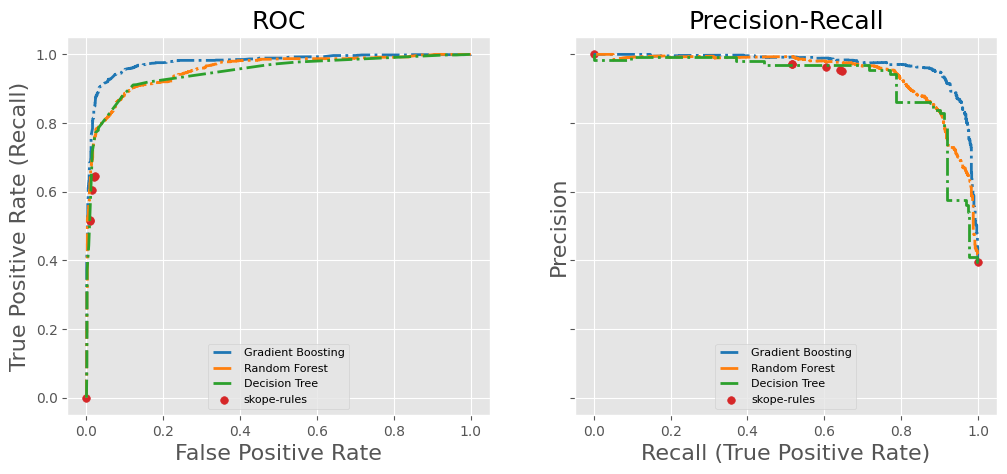

In [67]:
skope_rules_FS = sf.skopeRuleFit(df, "Converted")

## Friedman's RuleFit

In [68]:
rules = sf.friedmansRuleFit(df, "Converted")

,F1-Score
Gradient Boosted Classifier,0.93
Random Forest Classifier,0.91
RuleFit Classifier,0.89
Decision Tree Classifier,0.87
Logistic Regression,0.75


,rule,type,coef,support,importance
33,Tags > 12.5 & Tags <= 19.5,rule,-3.106601,0.159091,1.136273
11,Tags,linear,0.137839,1.000000,0.849318
10,What_matters_most_to_you_in_choosing_a_course,linear,-0.911422,1.000000,0.830477
202,Tags <= 21.5 & Tags > 13.5 & Tags > 18.5 & Last_Notable_Activity > 11.0,rule,2.250747,0.132867,0.763973
209,Tags > 17.5 & Tags > 20.5,rule,-2.577020,0.057692,0.600860
198,Tags > 1.5 & Tags <= 19.5 & Lead_Quality <= 2.5 & Tags <= 3.0,rule,3.393071,0.027972,0.559493
19,Last_Notable_Activity,linear,-0.170130,1.000000,0.523955
30,Asymmetrique_Activity_Score <= 14.5 & Lead_Quality > 2.5 & Last_Activity <= 12.0,rule,-0.779613,0.396853,0.381422
52,Total_Time_Spent_on_Website > 560.5 & Tags > 0.5,rule,0.653262,0.314685,0.303369
36,Asymmetrique_Activity_Score <= 13.5 & Lead_Quality <= 2.5 & Lead_Profile > 4.5,rule,-1.144012,0.068182,0.288357


Number of Linear Rules Generated         :20
Number of Rules Generated                :298


In [ ]:
rules[rules.type=='linear']

,rule,type,coef,support,importance
0,Lead_Origin,linear,0.000000,1.0,0.000000
1,Lead_Source,linear,-0.009263,1.0,0.030421
2,Do_Not_Email,linear,-0.959414,1.0,0.257087
3,TotalVisits,linear,0.022186,1.0,0.066255
4,Total_Time_Spent_on_Website,linear,0.000000,1.0,0.000000
5,Last_Activity,linear,-0.008060,1.0,0.032704
6,Country,linear,0.050553,1.0,0.160496
7,Specialization,linear,-0.008326,1.0,0.042992
8,How_did_you_hear_about_X_Education,linear,0.000000,1.0,0.000000
9,What_is_your_current_occupation,linear,0.114593,1.0,0.164295


In [69]:
rules.sort_values(by="importance", ascending=False).head(10)

,rule,type,coef,support,importance
33,Tags > 12.5 & Tags <= 19.5,rule,-3.106601,0.159091,1.136273
11,Tags,linear,0.137839,1.000000,0.849318
10,What_matters_most_to_you_in_choosing_a_course,linear,-0.911422,1.000000,0.830477
202,Tags <= 21.5 & Tags > 13.5 & Tags > 18.5 & Last_Notable_Activity > 11.0,rule,2.250747,0.132867,0.763973
209,Tags > 17.5 & Tags > 20.5,rule,-2.577020,0.057692,0.600860
198,Tags > 1.5 & Tags <= 19.5 & Lead_Quality <= 2.5 & Tags <= 3.0,rule,3.393071,0.027972,0.559493
19,Last_Notable_Activity,linear,-0.170130,1.000000,0.523955
30,Asymmetrique_Activity_Score <= 14.5 & Lead_Quality > 2.5 & Last_Activity <= 12.0,rule,-0.779613,0.396853,0.381422
52,Total_Time_Spent_on_Website > 560.5 & Tags > 0.5,rule,0.653262,0.314685,0.303369
36,Asymmetrique_Activity_Score <= 13.5 & Lead_Quality <= 2.5 & Lead_Profile > 4.5,rule,-1.144012,0.068182,0.288357
